<a href="https://colab.research.google.com/github/KR-0822/Diffusion_RL/blob/main/Diffusion_RL_1011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-jh3mxq8r
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-jh3mxq8r
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.9 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369497 sha256=711abcd567f8eabdfcdc45cffcc3ad382278336ecbb51df768f590da96beeac3
  Stored in directory: /tmp/pip-ephem-wheel-cache-b0xa8ywh/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [ ]:
!pip install wandb
!pip install transformers
!pip install xformers
!pip install accelerate
!pip install git+https://github.com/huggingface/diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.6 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=8ad7c57800a81479cf8af9f8d6ad7117ea096ae8146a43033d3e9cb82f28ddaa
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
import requests
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import clip # pip install git+https://github.com/openai/CLIP.git
import torch
import random
import math
import wandb
from torch import nn
from diffusers import StableDiffusionPipeline, DDIMScheduler
from PIL import Image
from fastprogress import progress_bar, master_bar

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
torch.backends.cuda.matmul.allow_tf32 = True
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4").to("cuda")
pipe.enable_attention_slicing()
pipe.enable_xformers_memory_efficient_attention()
pipe.text_encoder.requires_grad_(False)
pipe.vae.requires_grad_(False)

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


AutoencoderKL(
  (encoder): Encoder(
    (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (down_blocks): ModuleList(
      (0): DownEncoderBlock2D(
        (resnets): ModuleList(
          (0-1): 2 x ResnetBlock2D(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv1): LoRACompatibleConv(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
            (dropout): Dropout(p=0.0, inplace=False)
            (conv2): LoRACompatibleConv(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (nonlinearity): SiLU()
          )
        )
        (downsamplers): ModuleList(
          (0): Downsample2D(
            (conv): LoRACompatibleConv(128, 128, kernel_size=(3, 3), stride=(2, 2))
          )
        )
      )
      (1): DownEncoderBlock2D(
        (resnets): ModuleList(
          (0): ResnetBlock2D(
            (norm1): GroupNorm(32, 128, ep

In [ ]:
prompt = "a photograph of an astronaut riding a horse"
img = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size, xcol='emb', ycol='avg_rating'):
        super().__init__()
        self.input_size = input_size
        self.xcol = xcol
        self.ycol = ycol
        self.layers = nn.Sequential(
            nn.Linear(self.input_size, 1024),
            #nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(1024, 128),
            #nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            #nn.ReLU(),
            nn.Dropout(0.1),

            nn.Linear(64, 16),
            #nn.ReLU(),

            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.layers(x)


In [ ]:
def load_aesthetic_model_weights(cache="."):
    weights_fname = "sac+logos+ava1-l14-linearMSE.pth"
    loadpath = os.path.join(cache, weights_fname)

    if not os.path.exists(loadpath):
        url = (
            "https://github.com/christophschuhmann/"
            f"improved-aesthetic-predictor/blob/main/{weights_fname}?raw=true"
        )
        r = requests.get(url)

        with open(loadpath, "wb") as f:
            f.write(r.content)

    weights = torch.load(loadpath, map_location=torch.device("cpu"))
    return weights

In [ ]:
def aesthetic_model_normalize(a, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(a, order, axis))
    l2[l2 == 0] = 1
    return a / np.expand_dims(l2, axis)

In [ ]:
clip_model, preprocess = clip.load("ViT-L/14", device="cuda")


100%|████████████████████████████████████████| 890M/890M [00:04<00:00, 207MiB/s]


In [ ]:
aesthetic_model = MLP(768)


In [ ]:
aesthetic_model.load_state_dict(load_aesthetic_model_weights())
aesthetic_model.cuda()


MLP(
  (layers): Sequential(
    (0): Linear(in_features=768, out_features=1024, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): Linear(in_features=1024, out_features=128, bias=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): Dropout(p=0.1, inplace=False)
    (6): Linear(in_features=64, out_features=16, bias=True)
    (7): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [ ]:
image = preprocess(img).unsqueeze(0).cuda()
with torch.no_grad(): image_features = clip_model.encode_image(image)


In [ ]:
im_emb_arr = aesthetic_model_normalize(image_features.cpu().detach().numpy())
prediction = aesthetic_model(torch.from_numpy(im_emb_arr).float().cuda())


In [ ]:
print(f'Aesthetic score: {prediction}')


Aesthetic score: tensor([[5.1060]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [ ]:
def aesthetic_scoring(img, preprocess, clip_model, aesthetic_model_normalize, aesthetic_model):
    image = preprocess(img).unsqueeze(0).cuda()
    with torch.no_grad(): image_features = clip_model.encode_image(image)
    im_emb_arr = aesthetic_model_normalize(image_features.cpu().detach().numpy())
    prediction = aesthetic_model(torch.from_numpy(im_emb_arr).float().cuda())
    return prediction


  0%|          | 0/50 [00:00<?, ?it/s]

Aesthetic score: 5.524618148803711


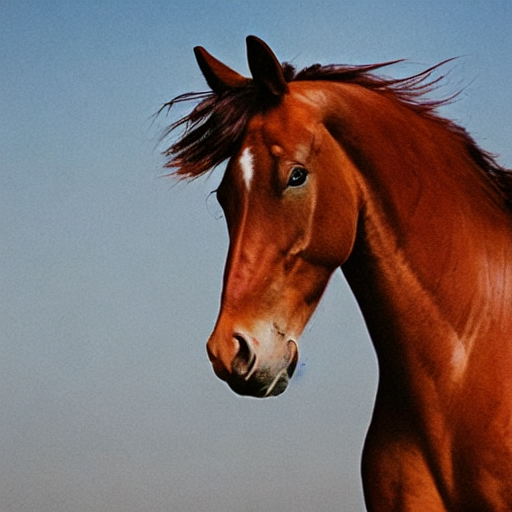

In [ ]:
prompt = "a horse"
img = pipe(prompt).images[0]
print(f'Aesthetic score: {aesthetic_scoring(img, preprocess, clip_model, aesthetic_model_normalize, aesthetic_model)[0][0]}')
img


  0%|          | 0/50 [00:00<?, ?it/s]

Aesthetic score: 5.765305519104004


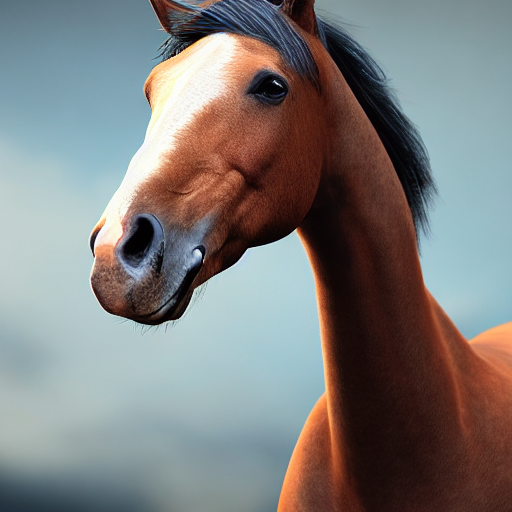

In [ ]:
prompt = "a beautiful, exquisite portrait of a horse, 4k, unreal engine"
img = pipe(prompt).images[0]
print(f'Aesthetic score: {aesthetic_scoring(img, preprocess, clip_model, aesthetic_model_normalize, aesthetic_model)[0][0]}')
img


In [ ]:
prompt = "a very ugly photograph of a donkey"
img = pipe(prompt).images[0]
print(f'Aesthetic score: {aesthetic_scoring(img, preprocess, clip_model, aesthetic_model_normalize, aesthetic_model)[0][0]}')
img


NameError: ignored

In [ ]:
import requests
from io import BytesIO
img = Image.open(BytesIO(requests.get("https://i.redd.it/8wbqtdequzv41.jpg").content)).resize((512,512))
print(f'Aesthetic score: {aesthetic_scoring(img, preprocess, clip_model, aesthetic_model_normalize, aesthetic_model)[0][0]}')
img


In [ ]:
!wget https://raw.githubusercontent.com/formigone/tf-imagenet/master/LOC_synset_mapping.txt


In [ ]:
synsets = {k:v for k,v in [o.split(',')[0].split(' ', maxsplit=1) for o in Path('LOC_synset_mapping.txt').read_text().splitlines()]}

imagenet_classes = list(synsets.values())


In [ ]:
def imagenet_animal_prompts():
    animal = random.choice(imagenet_classes[:397])
    prompts = f'{animal}'
    return prompts


In [ ]:
imagenet_animal_prompts()


In [ ]:
class PromptDataset(torch.utils.data.Dataset):
    def __init__(self, prompt_fn, num):
        super().__init__()
        self.prompt_fn = prompt_fn
        self.num = num

    def __len__(self): return self.num
    def __getitem__(self, x): return self.prompt_fn()


In [ ]:
pipe.scheduler = DDIMScheduler(
    num_train_timesteps=pipe.scheduler.num_train_timesteps,
    beta_start=pipe.scheduler.beta_start,
    beta_end=pipe.scheduler.beta_end,
    beta_schedule=pipe.scheduler.beta_schedule,
    trained_betas=pipe.scheduler.trained_betas,
    clip_sample=pipe.scheduler.clip_sample,
    set_alpha_to_one=pipe.scheduler.set_alpha_to_one,
    steps_offset=pipe.scheduler.steps_offset,
    prediction_type=pipe.scheduler.prediction_type
)


In [ ]:
@torch.no_grad()
def sd_sample(prompts, pipe, height, width, guidance_scale, num_inference_steps, eta, device):
    scheduler = pipe.scheduler
    unet = pipe.unet
    text_embeddings = pipe._encode_prompt(prompts,device, 1, do_classifier_free_guidance=guidance_scale > 1.0)

    scheduler.set_timesteps(num_inference_steps, device=device)
    latents = torch.randn((len(prompts), unet.in_channels, height//8, width//8)).to(device)

    all_step_preds = []

    for i, t in enumerate(progress_bar(scheduler.timesteps)):
        input = torch.cat([latents] * 2)
        input = scheduler.scale_model_input(input, t)

        # predict the noise residual
        pred = unet(input, t, encoder_hidden_states=text_embeddings).sample

        # perform guidance
        pred_uncond, pred_text = pred.chunk(2)
        pred = pred_uncond + guidance_scale * (pred_text - pred_uncond)

        # compute the "previous" noisy sample
        scheduler_output = scheduler.step(pred, t, latents, eta)

        all_step_preds.append(scheduler_output)
        latents = scheduler_output.prev_sample

    return latents, all_step_preds


In [ ]:
preds, all_step_preds = sd_sample([prompt]*2, pipe, 512, 512, 7.5, 50, 1, 'cuda')


In [ ]:
@torch.no_grad()
def decoding_fn(latents,pipe):
    images = pipe.vae.decode(1 / 0.18215 * latents.cuda()).sample
    images = (images / 2 + 0.5).clamp(0, 1)
    images = images.detach().cpu().permute(0, 2, 3, 1).numpy()
    images = (images * 255).round().astype("uint8")
    return images


In [ ]:
def aesthetic_scoring(imgs, preprocess, clip_model, aesthetic_model_normalize, aesthetic_model):
    imgs = torch.stack([preprocess(Image.fromarray(img)).cuda() for img in imgs])
    with torch.no_grad(): image_features = clip_model.encode_image(imgs)
    im_emb_arr = aesthetic_model_normalize(image_features.cpu().detach().numpy())
    prediction = aesthetic_model(torch.from_numpy(im_emb_arr).float().cuda())
    return prediction


In [ ]:
imgs = decoding_fn(preds,pipe)
aesthetic_scoring2(imgs, preprocess, clip_model, aesthetic_model_normalize, aesthetic_model)


In [ ]:
train_set = PromptDataset(imagenet_animal_prompts, 1000)
train_dl = torch.utils.data.DataLoader(train_set, batch_size=2, shuffle=True, num_workers=0)


In [ ]:
prompts = next(iter(train_dl))
preds, all_step_preds = sd_sample(prompts, pipe, 512, 512, 7.5, 50, 1, 'cuda')
imgs = decoding_fn(preds,pipe)
rewards = aesthetic_scoring(imgs, preprocess, clip_model, aesthetic_model_normalize, aesthetic_model)


In [ ]:
index = torch.where(rewards == rewards.min())[0][0]
print(prompts[index])
Image.fromarray(imgs[index])


In [ ]:
index = torch.where(rewards == rewards.max())[0][0]
print(prompts[index])
Image.fromarray(imgs[index])


In [ ]:
from collections import deque
class PerPromptStatTracker:
    def __init__(self, buffer_size, min_count):
        self.buffer_size = buffer_size
        self.min_count = min_count
        self.stats = {}

    def update(self, prompts, rewards):
        unique = np.unique(prompts)
        advantages = np.empty_like(rewards)
        for prompt in unique:
            prompt_rewards = rewards[prompts == prompt]
            if prompt not in self.stats:
                self.stats[prompt] = deque(maxlen=self.buffer_size)
            self.stats[prompt].extend(prompt_rewards)

            if len(self.stats[prompt]) < self.min_count:
                mean = np.mean(rewards)
                std = np.std(rewards) + 1e-6
            else:
                mean = np.mean(self.stats[prompt])
                std = np.std(self.stats[prompt]) + 1e-6
            advantages[prompts == prompt] = (prompt_rewards - mean) / std

        return advantages


In [ ]:
per_prompt_stat_tracker = PerPromptStatTracker(buffer_size=32, min_count=16)


In [ ]:
rewards.squeeze().cpu()


In [ ]:
advantages = per_prompt_stat_tracker.update(np.array(prompts), rewards.squeeze().cpu().detach().numpy())


In [ ]:
advantages


In [ ]:
per_prompt_stat_tracker.stats


In [ ]:
Image.fromarray(decoding_fn(all_step_preds[0].prev_sample, pipe)[0])


In [ ]:
Image.fromarray(decoding_fn(all_step_preds[30].prev_sample, pipe)[0])


DDPO
https://www.tanishq.ai/blog/posts/ddpo_derivation.pdf

In [ ]:
def calculate_log_probs(prev_sample, prev_sample_mean, std_dev_t):
    std_dev_t = torch.clip(std_dev_t, 1e-6)
    log_probs = -((prev_sample.detach() - prev_sample_mean) ** 2) / (2 * std_dev_t ** 2) - torch.log(std_dev_t) - math.log(math.sqrt(2 * math.pi))
    return log_probs


In [ ]:
@torch.no_grad()
def sd_sample(prompts, pipe, height, width, guidance_scale, num_inference_steps, eta, device):
    scheduler = pipe.scheduler
    unet = pipe.unet
    text_embeddings = pipe._encode_prompt(prompts,device, 1, do_classifier_free_guidance=guidance_scale > 1.0)

    scheduler.set_timesteps(num_inference_steps, device=device)
    latents = torch.randn((len(prompts), unet.in_channels, height//8, width//8)).to(device)

    all_step_preds, log_probs = [latents], []


    for i, t in enumerate(progress_bar(scheduler.timesteps)):
        input = torch.cat([latents] * 2)
        input = scheduler.scale_model_input(input, t)

        # predict the noise residual
        pred = unet(input, t, encoder_hidden_states=text_embeddings).sample

        # perform guidance
        pred_uncond, pred_text = pred.chunk(2)
        pred = pred_uncond + guidance_scale * (pred_text - pred_uncond)

        # compute the "previous" noisy sample mean and variance, and get log probs
        scheduler_output = scheduler.step(pred, t, latents, eta, variance_noise=0)
        t_1 = t - scheduler.config.num_train_timesteps // num_inference_steps
        variance = scheduler._get_variance(t, t_1)
        std_dev_t = eta * variance ** (0.5)
        prev_sample_mean = scheduler_output.prev_sample # this is the mean and not full sample since variance is 0
        prev_sample = prev_sample_mean + torch.randn_like(prev_sample_mean) * std_dev_t # get full sample by adding noise
        log_probs.append(calculate_log_probs(prev_sample, prev_sample_mean, std_dev_t).mean(dim=tuple(range(1, prev_sample_mean.ndim))))

        all_step_preds.append(prev_sample)
        latents = prev_sample

    return latents, torch.stack(all_step_preds), torch.stack(log_probs)


In [ ]:
per_prompt_stat_tracker = PerPromptStatTracker(buffer_size=32, min_count=16)
prompts = next(iter(train_dl))
pipe.text_encoder.to('cuda')
pipe.vae.to('cuda')
preds, all_step_preds, log_probs = sd_sample(prompts, pipe, 512, 512, 7.5, 50, 1, 'cuda')
imgs = decoding_fn(preds,pipe)
rewards = aesthetic_scoring(imgs, preprocess, clip_model, aesthetic_model_normalize, aesthetic_model)
advantages = torch.from_numpy(per_prompt_stat_tracker.update(np.array(prompts), rewards.squeeze().cpu().detach().numpy())).float().to('cuda')


In [ ]:
def compute_loss(x_t, original_log_probs, advantages, clip_advantages, clip_ratio, prompts, pipe, num_inference_steps, guidance_scale, eta, device):
    scheduler = pipe.scheduler
    unet = pipe.unet
    text_embeddings = pipe._encode_prompt(prompts,device, 1, do_classifier_free_guidance=guidance_scale > 1.0).detach()
    scheduler.set_timesteps(num_inference_steps, device=device)
    loss_value = 0.
    for i, t in enumerate(progress_bar(scheduler.timesteps)):
        clipped_advantages = torch.clip(advantages, -clip_advantages, clip_advantages).detach()

        input = torch.cat([x_t[i].detach()] * 2)
        input = scheduler.scale_model_input(input, t)

        # predict the noise residual
        pred = unet(input, t, encoder_hidden_states=text_embeddings).sample

        # perform guidance
        pred_uncond, pred_text = pred.chunk(2)
        pred = pred_uncond + guidance_scale * (pred_text - pred_uncond)

        # compute the "previous" noisy sample mean and variance, and get log probs
        scheduler_output = scheduler.step(pred, t, x_t[i].detach(), eta, variance_noise=0)
        t_1 = t - scheduler.config.num_train_timesteps // num_inference_steps
        variance = scheduler._get_variance(t, t_1)
        std_dev_t = eta * variance ** (0.5)
        prev_sample_mean = scheduler_output.prev_sample
        current_log_probs = calculate_log_probs(x_t[i+1].detach(), prev_sample_mean, std_dev_t).mean(dim=tuple(range(1, prev_sample_mean.ndim)))

        # calculate loss

        ratio = torch.exp(current_log_probs - original_log_probs[i].detach()) # this is the importance ratio of the new policy to the old policy
        unclipped_loss = -clipped_advantages * ratio # this is the surrogate loss
        clipped_loss = -clipped_advantages * torch.clip(ratio, 1. - clip_ratio, 1. + clip_ratio) # this is the surrogate loss, but with artificially clipped ratios
        loss = torch.max(unclipped_loss, clipped_loss).mean() # we take the max of the clipped and unclipped surrogate losses, and take the mean over the batch
        loss.backward() # perform backward here, gets accumulated for all the timesteps

        loss_value += loss.item()
    return loss_value


In [ ]:
loss = compute_loss(all_step_preds, log_probs, advantages, 10, 1e-4, prompts, pipe, 50, 7.5, 1, 'cuda')
print(loss)


In [ ]:
num_samples_per_epoch = 128
num_epochs = 50
num_inner_epochs = 1
num_timesteps = 50
batch_size = 4
img_size = 512
lr = 5e-6
clip_advantages = 10.0
clip_ratio = 1e-4
cfg = 5.0


In [ ]:
# group all reward function stuff
def reward_fn(imgs, device):
    clip_model.to(device)
    aesthetic_model.to(device)
    rewards = aesthetic_scoring(imgs, preprocess, clip_model, aesthetic_model_normalize, aesthetic_model)
    clip_model.to('cpu')
    aesthetic_model.to('cpu')
    return rewards


In [ ]:
# a function to sample from the model and calculate rewards
def sample_and_calculate_rewards(prompts, pipe, image_size, cfg, num_timesteps, decoding_fn, reward_fn, device):
    preds, all_step_preds, log_probs = sd_sample(prompts, pipe, image_size, image_size, cfg, num_timesteps, 1, device)
    imgs = decoding_fn(preds,pipe)
    rewards = reward_fn(imgs, device)
    return imgs, rewards, all_step_preds, log_probs


In [ ]:
train_set = PromptDataset(imagenet_animal_prompts, num_samples_per_epoch)
train_dl = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True, num_workers=0)
per_prompt_stat_tracker = PerPromptStatTracker(buffer_size=32, min_count=16)
sample_prompts = next(iter(train_dl)) # sample a batch of prompts to use for visualization


In [ ]:
pipe.unet.enable_gradient_checkpointing() # more performance optimization


In [ ]:
optimizer = torch.optim.AdamW(pipe.unet.parameters(), lr=lr, weight_decay=1e-4) # optimizer


In [ ]:
for epoch in master_bar(range(num_epochs)):
    all_step_preds, log_probs, advantages, all_prompts, all_rewards = [], [], [], [], []

    # sampling `num_samples_per_epoch` images and calculating rewards
    for i, prompts in enumerate(progress_bar(train_dl)):
        batch_imgs, rewards, batch_all_step_preds, batch_log_probs = sample_and_calculate_rewards(prompts, pipe, img_size, cfg, num_timesteps, decoding_fn, reward_fn, 'cuda')
        batch_advantages = torch.from_numpy(per_prompt_stat_tracker.update(np.array(prompts), rewards.squeeze().cpu().detach().numpy())).float().to('cuda')
        all_step_preds.append(batch_all_step_preds)
        log_probs.append(batch_log_probs)
        advantages.append(batch_advantages)
        all_prompts += prompts
        all_rewards.append(rewards)

    all_step_preds = torch.cat(all_step_preds, dim=1)
    log_probs = torch.cat(log_probs, dim=1)
    advantages = torch.cat(advantages)
    all_rewards = torch.cat(all_rewards)

    # inner loop
    for inner_epoch in progress_bar(range(num_inner_epochs)):
        # chunk them into batches
        all_step_preds_chunked = torch.chunk(all_step_preds, num_samples_per_epoch // batch_size, dim=1)
        log_probs_chunked = torch.chunk(log_probs, num_samples_per_epoch // batch_size, dim=1)
        advantages_chunked = torch.chunk(advantages, num_samples_per_epoch // batch_size, dim=0)

        # chunk the prompts (list of strings) into batches
        all_prompts_chunked = [all_prompts[i:i + batch_size] for i in range(0, len(all_prompts), batch_size)]

        for i in progress_bar(range(len(all_step_preds_chunked))):
            optimizer.zero_grad()

            loss = compute_loss(all_step_preds_chunked[i], log_probs_chunked[i],
                                advantages_chunked[i], clip_advantages, clip_ratio, all_prompts_chunked[i], pipe, num_timesteps, cfg, 1, 'cuda'
                                ) # loss.backward happens inside

            torch.nn.utils.clip_grad_norm_(pipe.unet.parameters(), 1.0) # gradient clipping
            optimizer.step()
